# COGS 118B - Final Project

# Clustering Techniques for Genre Classification in Spotify

## Group members
- Sreetama Chowdhury
- Lucy Lennemann
- Nikki Rejai
- Melvyn Nam Qiang Tan

# Abstract 
The goal of this project is to address the genre categorization problem in the realm of music, utilizing clustering techniques on the Spotify 1.2M+ Songs dataset. With over 100,000 songs released daily, our objective is to categorize songs into distinct genres based on their audio features, hypothesizing that songs within the same genre share similarities in variables like tempo and danceability. The dataset, comprising 24 variables including danceability, tempo, and acousticness, is sourced from the Spotify API. To understand the data, we plan to dimensionally reduce it using Principal Component Analysis and then visualizing the reduced data using t-SNE and UMAP. After that, we plan to implement K-means clustering, DBSCAN, and Spectral Clustering. Since we have no ground truth available for genres, we will be evaluating the effectiveness of our clustering by using the silhouette score. The data preparation phase involves handling null values, potential one-hot encoding, and standardization. The end goal of this project is to enhance Spotify user experience by generating personalized recommendations and playlists that align with individual music tastes and preferences. The success of our clustering models will be assessed using the silhouette score, which provides insights into the accuracy of our clusters, hence reflecting the accuracy of our genre categorization approach.

# Background

With the ubiquitous influence of the internet on our daily lives, the wealth of available data continues to increase rapidly. This abundance of data has many benefits as organizations have the opportunity to use this data to optimize their user engagement by understanding user behavior and trends <a name="henke"></a>[<sup>[1]</sup>](#henkenote). Spotify, a leading music streaming platform, has an expansive repository of music-related data, offering insights into popularity of songs and/or artists, users’ music consumption patterns, trends, and song characteristics. The platform hosts an extensive breadth of songs spanning various genres, artists, and musical styles,  prompting an intriguing question: how can we effectively define and categorize this diverse musical library? 

Given the sheer volume of songs available, there is immense potential in classifying tracks into categories, such as musical genres. By classifying the songs on their platform, Spotify can enhance their user experience by providing personalized song recommendations, and playlists, which aligns with individual preferences <a name="zhangjiang"></a>[<sup>[2]</sup>](#zhangjiangnote). Moreover, understanding different nuances and patterns within the dataset can offer valuable insights into user behavior, music trends, and emerging genres. To tackle the complexities presented by the numerous number of variables (more than 16), we will begin with Principal Component Analysis (PCA) for dimensional reduction, followed by t-SNE and UMAP for deeper visualization. After understanding the data from the visualizations, we will then perform classification. 

Our exploration of classification techniques for large datasets led us to consider K-means clustering, Density-Based Spatial Clustering of Applications with Noise (DBSCAN), and Spectral Clustering as potential solutions. K-means is a centroid-based clustering algorithm that partitions the data into K clusters by iteratively updating the cluster centroids to minimize the within-cluster variance<a name="kodinariya"></a>[<sup>[3]</sup>](#kodinariyanote). K-means clustering is a versatile and efficient algorithm that can be used for various clustering tasks, especially when the dataset is very large and the clusters are well-separated. Additionally, we have chosen DBSCAN because of robustness to outliers and noise as well as its ability to detect clusters with irregular shapes makes it well-suited for music data<a name="dbscannote"></a>[<sup>[4]</sup>](#dbscan). Similarly, we have chosen Spectral Clustering because of its applicability to high-dimensional datasets and its ability to detect non-linearly shaped clusters <a name="spectralclusteringnote"></a>[<sup>[5]</sup>](#spectralclustering).  

In this project, we propose to use clustering techniques to group songs and determine song genres based on their audio features. We plan to employ K-means clustering, DBSCAN, and Spectral Clustering algorithms to explore the shape of the dataset and identify clusters representing different musical genres. By utilizing the scikit-learn library in Python, we aim to implement these models and evaluate their accuracy of classifying songs into meaningful genres. Our hypothesis is that clustering techniques, such as K-means, DBSCAN, and Spectral Clustering will be effective in identifying distinct clusters within the Spotify dataset that correspond to different musical genres. We anticipate that these models will provide valuable insights into the structure of the data and enable us to classify songs into genres with a high level of accuracy. Once we have classified the dataset into genres, our goal is to enhance the user experience on Spotify by providing personalized recommendations and curated playlists that cater to individual preferences and interests.


# Problem Statement
Music has always been one of the most popular forms of entertainment, as it can invoke feelings of relaxation and motivation. Because of its popularity, there are more than 100,000 songs released every day which presents a genre categorization problem. In this project, we aim to use clustering techniques with the Spotify 1.2M+ Songs dataset to categorize songs into distinct genres based on features such as tempo, danceability, and others. We hypothesize that songs in the same genre, such as pop, will have similar values for variables such as tempo and danceability. We will try K-Means, DBSCAN, and spectral clustering, using silhouette score as a metric to compare their results. 

# Data

We used the Spotify 1.2M+ Songs dataset <a name="figueroa"></a>[<sup>[6]</sup>](#figueroanote), created by Rodolfo Figueroa using the Spotify API, which we found available on Kaggle. The dataset has over 1.2 million songs and 24 variables. Notable variables include:
- Danceability: values from 0 to 1, with 0 indicating 0 danceability
- Tempo: measured in beats per minute (bpm)
- Acousticness: values from 0 to 1 
- Energy: values from 0 to 1
- Loudness: measured in decibels 
- Valence: values from 0 (extremely negative) to 1 (extremely positive)


In [2]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

import umap
import umap.umap_ as umap

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["font.size"] = 12

We read in data from the full dataset, but extracted a sample of 15000 observations, which is what we've uploaded to the GitHub repo -- the original was too large.

In [3]:
#tracks_features = pd.read_csv('tracks_features.csv')

In [4]:
#tracks_features.shape

In [5]:
# data.to_csv('data.csv', index=False)  

In [6]:
# data = tracks_features.sample(n=15000, random_state=42)
# data = data.reset_index(drop=True)
data = pd.read_csv('data.csv') # data subsample stored here

We drop all observations with missing data (which turns out to be none!) and take a look at the first handful of them, as well as a list of what columns/variables the df contains.

In [6]:
data = data.dropna()
data.shape

(15000, 24)

In [7]:
data.head()

id                                    name  \
0  1aGS6nf2xgv3Xzdob4eOO3                   Smokin' Sticky Sticky   
1  0fJfoqHIIiET2EcgjOfntG                  Holding Back the Years   
2  0V2R2LC8dR7S0REieXRaGt  All Along The Watchtower - Live - 1991   
3  4VUHYLocWOJ2GfvP78AmSs                               Windmills   
4  4m8a1AtmCnoeRzSYoQ0oX0                          Overnite Flite   

                    album                album_id           artists  \
0    Beat'n Down Yo Block  5ZO72kl3xMRRzlpod55k1Q           ['Unk']   
1  Holding Back The Years  7sV4kCqQYt8agM5TjkdOYU  ['Norm Douglas']   
2  Back On The Bus, Y'All  3jmmx4jRkul3POEhn1cgwF  ['Indigo Girls']   
3          Total Folklore  5PyLkzuxmT6EoVNZCg8Iya     ['Dan Friel']   
4   Normal Human Feelings  623VIdYR6Y0NCN9yPbMAC6   ['Little Suns']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['0PGtMx1bsqoCHCy3MB3gXA']            15            1      True   
1  ['4kxKyoiYhldUlnfeCZtD0D']             1            1     False   
2  ['4wM29TDTr3HI0qFY3KoSFG']             7            1     False   
3  ['4HKTPJw50BFASrfhJEHIVP']             2            1     False   
4  ['5OLcAqMbHpecNOIQyTduQ7']             2            1     False   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.623  ...       0.4020      0.002100          0.000000    0.0691   
1         0.585  ...       0.0333      0.316000          0.775000    0.0993   
2         0.331  ...       0.0379      0.709000          0.000000    0.9390   
3         0.193  ...       0.1090      0.000049          0.838000    0.2850   
4         0.546  ...       0.0323      0.427000          0.000105    0.1970   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.422   87.988       380427             4.0  2006    2006-10-03  
1    0.880  170.082       266520             4.0  2008    2008-06-13  
2    0.430   90.648       383773             4.0  1991    1991-06-04  
3    0.594  113.345        82493             4.0  2013    2013-02-19  
4    0.424  127.941       230667             1.0  2013    2013-10-08  

[5 rows x 24 columns]

In [8]:
data.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

Some exploratory data analysis:
1. Describing the data in terms of measures of central tendency
2. Graphically visualize the distributions of each numerical variable

In [34]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15000 non-null  object 
 1   name              15000 non-null  object 
 2   album             15000 non-null  object 
 3   album_id          15000 non-null  object 
 4   artists           15000 non-null  object 
 5   artist_ids        15000 non-null  object 
 6   track_number      15000 non-null  int64  
 7   disc_number       15000 non-null  int64  
 8   explicit          15000 non-null  bool   
 9   danceability      15000 non-null  float64
 10  energy            15000 non-null  float64
 11  key               15000 non-null  int64  
 12  loudness          15000 non-null  float64
 13  mode              15000 non-null  int64  
 14  speechiness       15000 non-null  float64
 15  acousticness      15000 non-null  float64
 16  instrumentalness  15000 non-null  float6

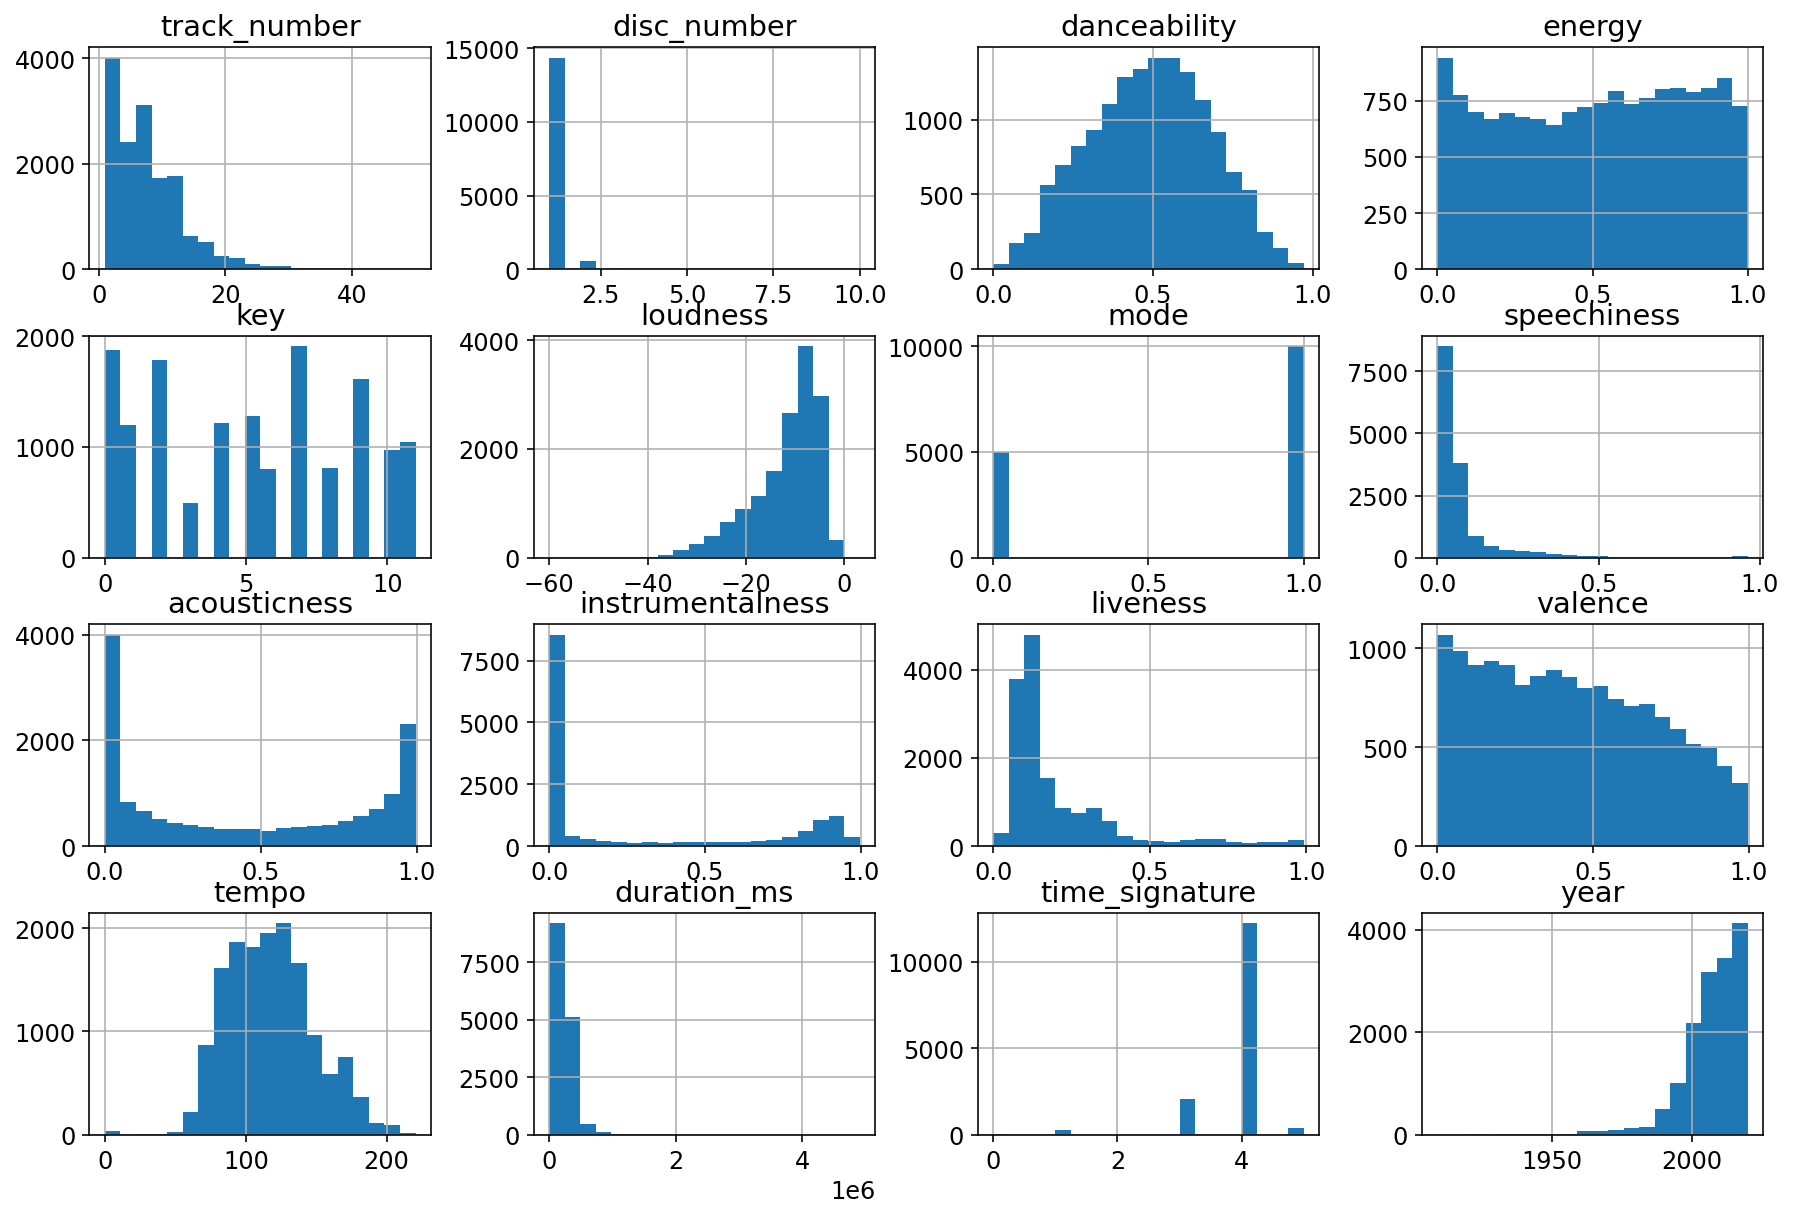

In [35]:
#visualizing distribution of numerical variables
data.hist(bins=20, figsize=(15, 10))
plt.show()

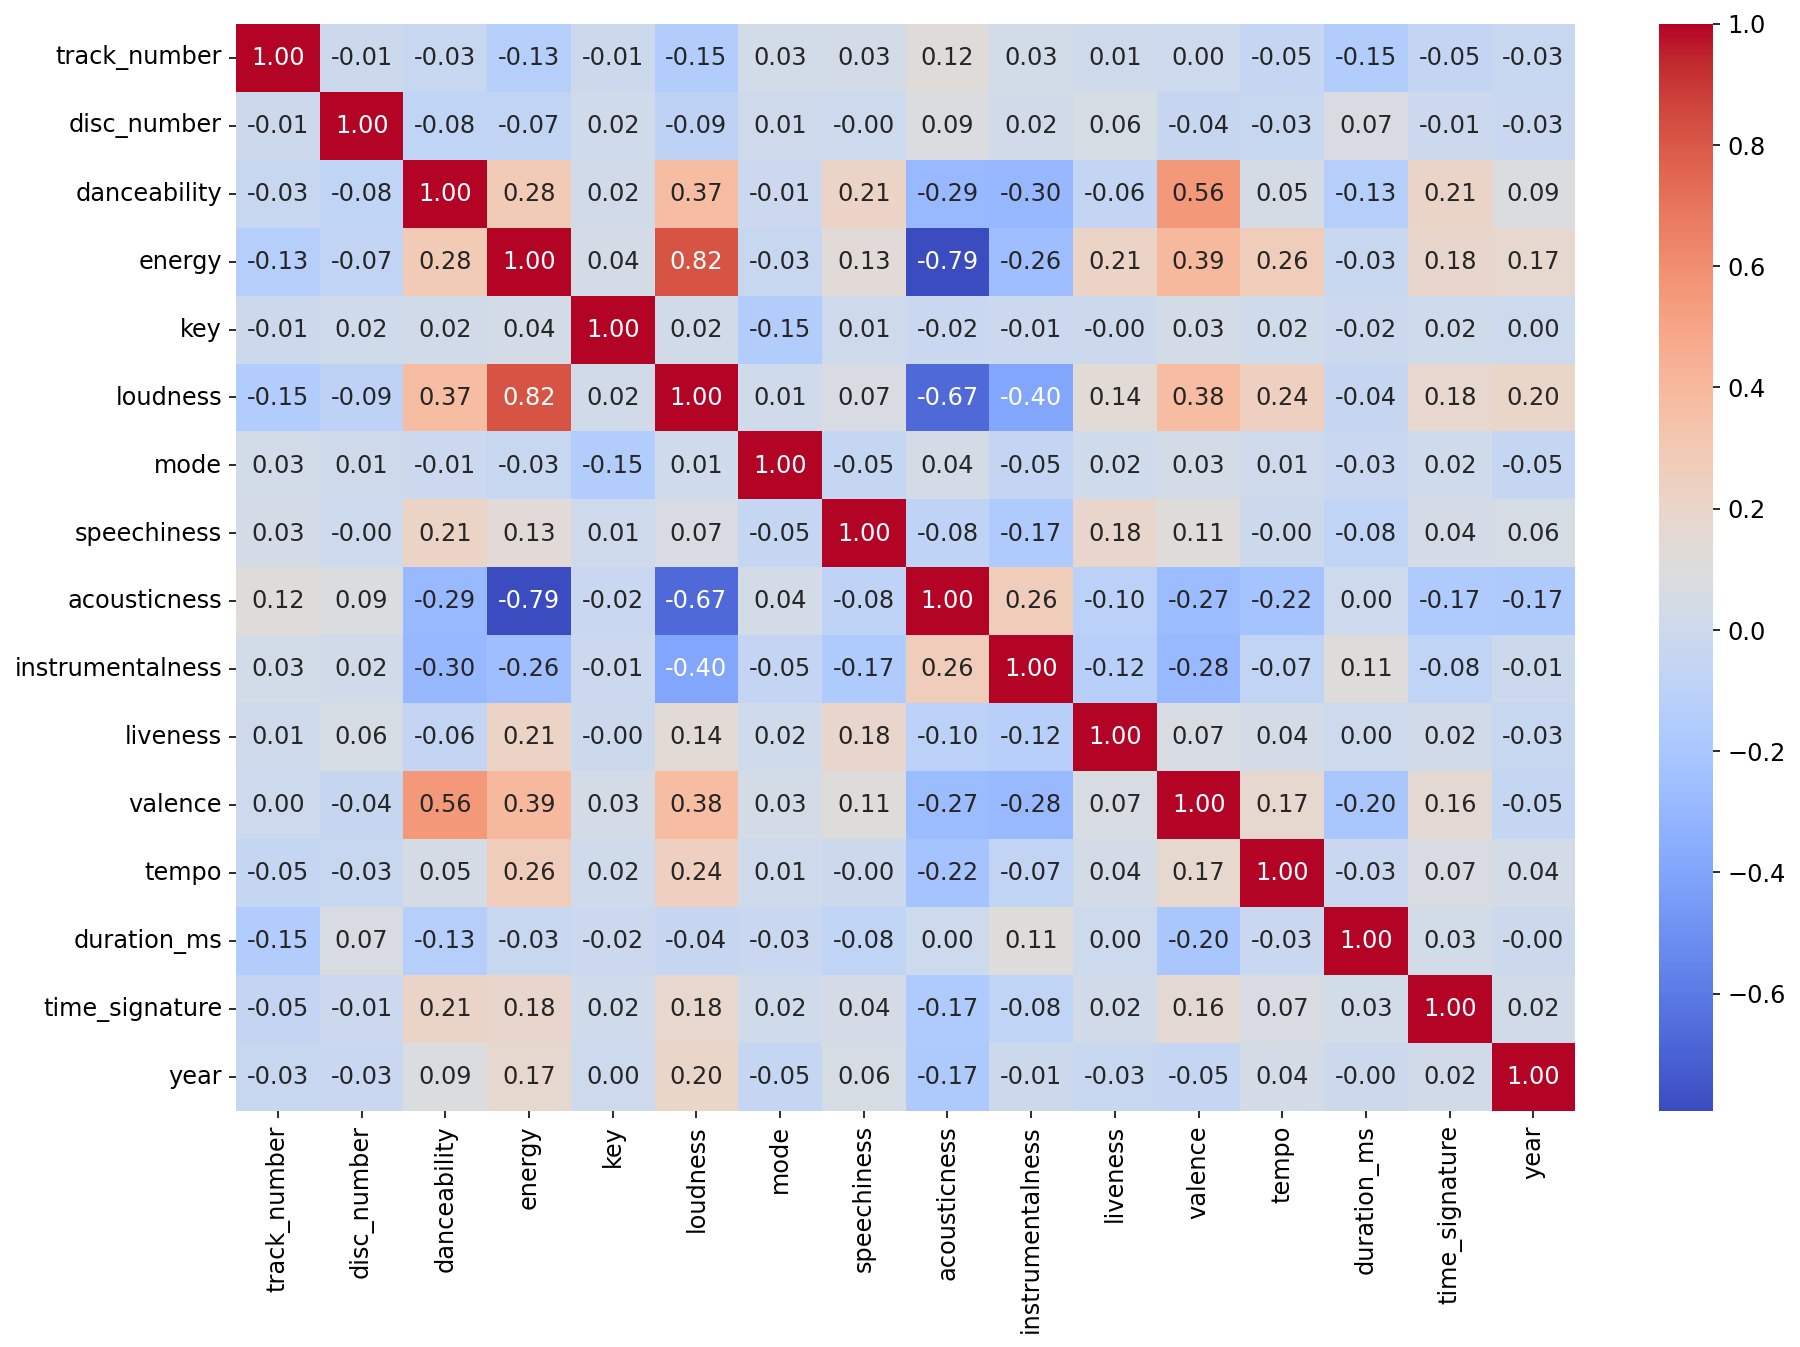

In [36]:
#correlation analysis of numeric variables
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Proposed Solution

We propose to use clustering techniques to group the songs and determine song genres based on our variables, such as tempo and valence. First, we will perform feature selection with PCA, t-SNE, and UMAP to both reduce our variables and gain a better understanding of our data. We will only use our numerical variables because if we one-hot encode our categorical variables, the dataset will be too large to work with. 

We plan to try the K-means, DBSCAN, and spectral clustering algorithms to explore patterns in the dataset, cluster the data, and determine whether these clusters accurately represent the genres in the dataset. As we don’t know whether the data has spherical shape or a different shape, we will try both clustering algorithms to determine the optimal model. We will implement these models with the Python library scikit-learn.

We will tune the hyperparameters of our models by iterating manually through different combinations of hyperparameters and seeing what gives the best silhouette score. After determining the optimal model, we will use qualitative analysis and the silhouette score to evaluate our model and whether we have achieved our goal of clustering the songs by genre.

For each individual model, we will adjust the hyperparameters. For example, for K-means, we will use silhouette scores and plot the distortion measure to see which value of k gives the best results. We will then analyze the clustering results to evaluate the performance of each model in grouping songs into their correct genres and assess the interpretability of the clusters generated by each algorithm.

# Evaluation Metrics
We propose using silhouette score as the evaluation metrics to assess the performance of our clustering models. Since our clustering task is unsupervised, the silhouette score is a valuable measure of the quality of clusters which measures the cohesion and separation of data points within each cluster, without needing the ground truth values. The silhouette score ranges from -1 to 1, where a higher silhouette score indicates better cluster separation and cohesion. The silhouette score, s(i), for any datapoint, i, is mathematically calculated using the equation below.

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

where a(i)  is the average distance from i to all other datapoints within the same cluster, and b(i) is the smallest average distance from ii to all datapoints in a different cluster. And the silhouette score for the entire dataset is the average of all the scores s(i) for all datapoints. Using the silhouette score will give us some insight to how effective our clustering models are in capturing meaningful patterns within the music dataset, and help us compare the performance of different clustering algorithms to determine the most suitable model for genre categorization for our dataset.


# Results
After an analysis of our data, we have decided to do feature selection first to reduce the number of variables, then perform clustering with DBSCAN, K-means, and spectral clustering. We have decided to omit methods such as Gaussian Mixture Models because we don't know if the data is normally distributed. 

## Feature Selection & Data Visualization: PCA, T-SNE & UMAP
In order to perform PCA, t-SNE or UMAP, we will need to drop non-numerical columns and then scale the numerical columns. We dropped the non-numerical columns because if we one-hot encode the categorical variables, the dataset becomes too large to work with.

In [8]:
# store some categorical info for hover text later
hover_info = pd.DataFrame(data=[data['name'], data['artists']]).transpose()

# Drop non-numerical or non-ordinal columns
data = data.drop(columns=['name', 'album', 'artists', 'id', 'year', 'release_date', 'artist_ids', 'album_id'])

# Change explicit to be integer type
data['explicit'] = data['explicit'].astype(int)

# Scale the numerical columns
numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## PCA
Since our dataset contains 16 variables/columns, we will use PCA to dimensionally reduce it, thereby making the dataset easier to work with since it will simplify the complexity of our dataset. PCA will transform our original variables into a smaller set of principal components that capture the most significant variance in the data. This will help us with visualizing the dataset and improving the computational efficient when performing t-SNE and UMAP.
These are the steps that we will take to perform PCA:
1. We will fit the PCA transformation to our scaled dataset. We will set n_components as "mle" that will estimate the best number of components to keep.
2. Plot a Scree plot to help us understand the optimal number of prinicipal components to keep. We will use the elbow method to choose the number of components that capture the most variance before it reaches the point of dominishing returns. We will eyeball the best value from the graph.
3. We will plot a cumulative variance plot to visualize the total variance as we include more components.
4. We will print the components of each PC value and interpret the results.

In [9]:
# change matplotlib visualization setting to better display graphs
plt.rcParams["figure.figsize"] = [10, 8]

# plotly defaults
pio.templates.default = "simple_white"
px.defaults.width = 800
px.defaults.height = 550

### Step 1: Fit PCA

In [10]:
# Step 1: Perform PCA
pca = PCA(n_components='mle', svd_solver='full')
# Fit the PCA transformation
pca.fit(data[numerical_columns])
# Transform data
data_pca = pca.transform(data[numerical_columns])

### Step 2: Plot Scree

Explained Variance Ratio: [0.33571656 0.13453561 0.11463454 0.09486981 0.08479915 0.07733143
 0.0747253  0.04090475 0.03077188]


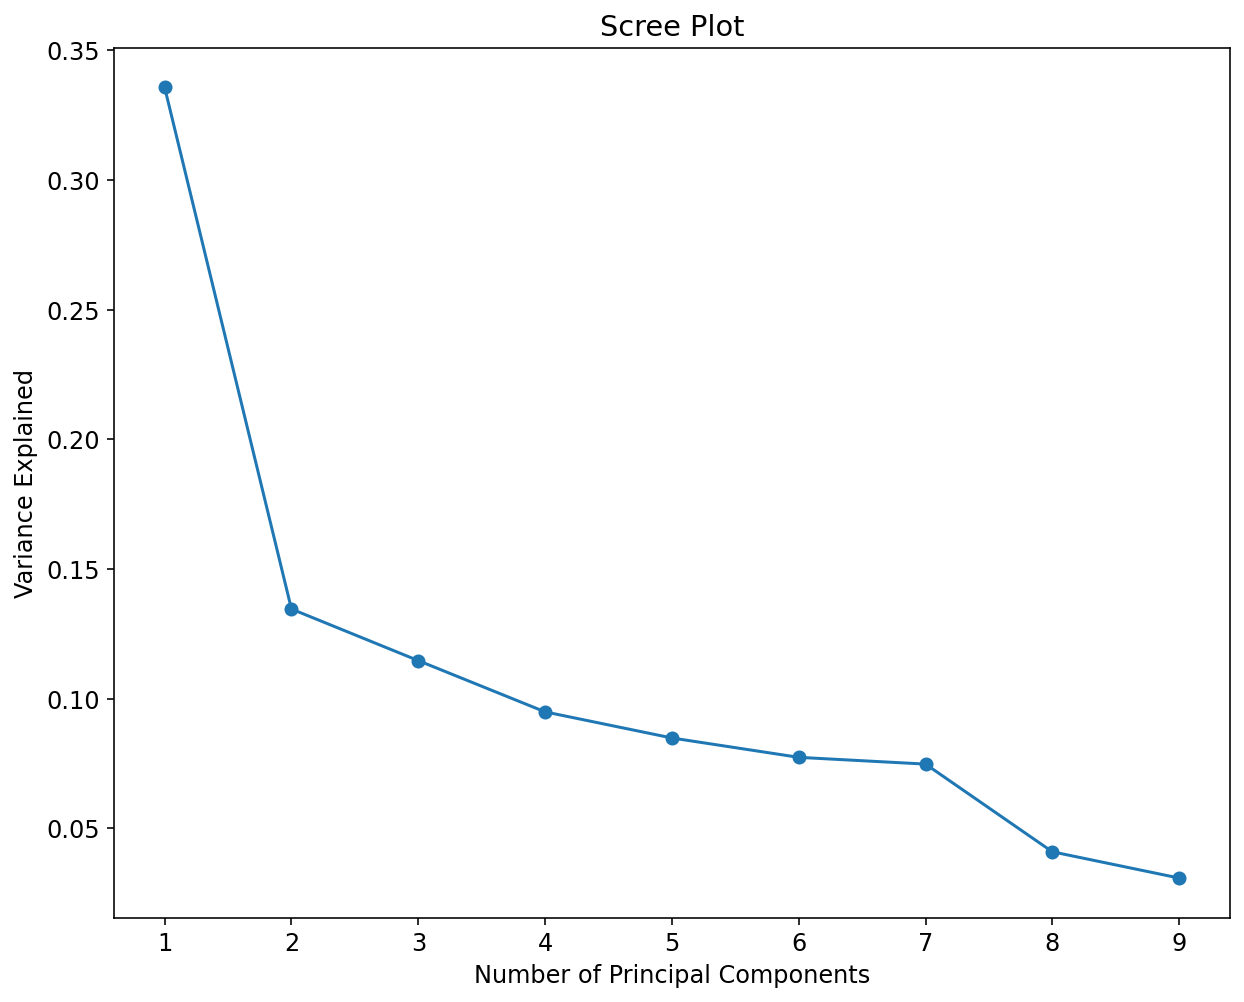

In [12]:
# Step 2: Examine the Output
# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the scree plot
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In step 2, we plotted a scree plot that represents the variance vs the number of principal components. We can observe that the first principal component is about 33.57% of the variance, the second principal component is about 13.45%, the third principal component is about 11.46% and so on. Using the elbow method, we can eyeball the point where the rate of decrease in variance sharply changes which is where the number of principal components is equal to 3. We can clearly observe that the variance begins to decrease slowly after the third principal component which is why 3 principal components is the elbow point.

### Step 3: Plot Cumulative Variance

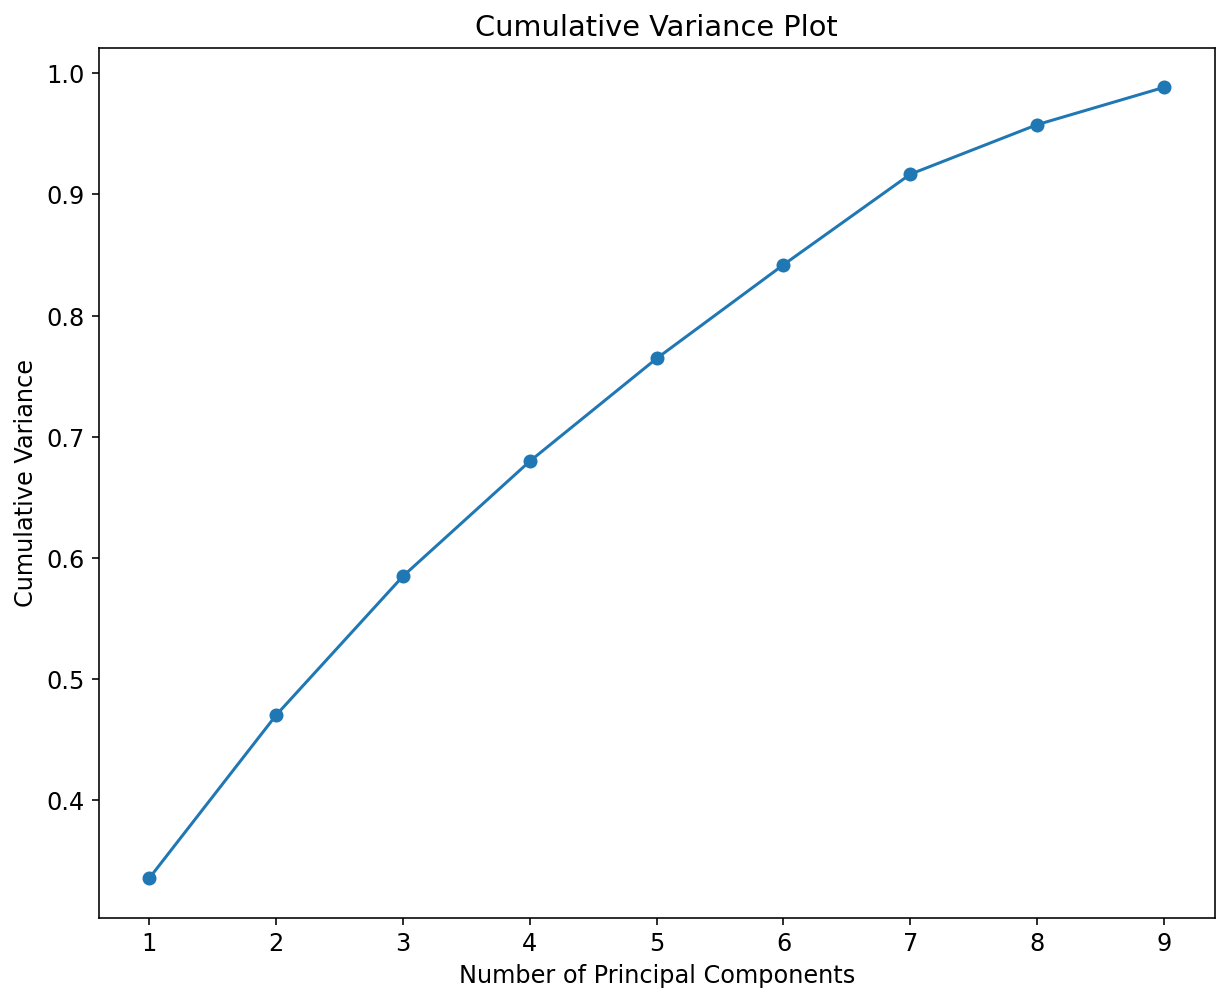

In [13]:
# Step 3: Cumulative variance plot
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.show()

In step 3, we plotted a cumulative variance plot to see how increasing the number of principal components affects the cumulative variance. Our chosen principal component value of 3 captures about 60% of the variance. Although capturing more variance is important, the elbow method in the previous step informed us that a principal component value of 3 is most optimal.

### Step 4: Value of PC Components

In [14]:
# Step 4: Value of PC Components
# Check the component loadings (weights)
loadings = pca.components_
# Make it easier to view values by placing in a dataframe
loadings_df = pd.DataFrame(loadings.T, columns=['PC{}'.format(i+1) for i in range(loadings.shape[0])], index=numerical_columns)
print(loadings_df)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
danceability     -0.317407 -0.453700 -0.196160  0.264126  0.228088  0.022590   
energy           -0.472915  0.288258  0.023917  0.014448 -0.108871 -0.224544   
loudness         -0.470282  0.198345 -0.053436  0.082209 -0.152175 -0.020269   
speechiness      -0.131948 -0.323945  0.572971  0.061180  0.453769 -0.477706   
acousticness      0.429650 -0.304565  0.050418 -0.099258  0.126162  0.278090   
instrumentalness  0.283963  0.238955 -0.154506 -0.133142  0.196770 -0.602086   
liveness         -0.119124  0.123816  0.722424 -0.256354 -0.134478  0.314759   
valence          -0.342361 -0.367753 -0.189552 -0.045626  0.148340  0.209022   
tempo            -0.183871  0.232230 -0.195995 -0.657618  0.587540  0.198496   
duration_ms       0.081137  0.460890  0.084517  0.625849  0.516848  0.313767   

                       PC7       PC8       PC9  
danceability      0.232172  0.676704  0.006086  
energy            0.0

In step 4, we printed the value of the 9 PC components to get a better understanding of their values. The values in PC1 tell us that it is negatively influenced by danceability, energy, and loudness. It is however postively influenced by acousticness and instrumentalness which tells us that PC1 captures more acoustic and instrumental types of music such as fold music. Moreover, the values in PC2 show that it is negatively influenced by danceability, speechiness, acousticeness, and valence but is positively influenced by energy, loudness, and duration. This tells us that it captures shorter, louder tracks that are not danceable. Additionally, the values in PC3 tell us that it is negatively influenced by instrumentalness, valence, and tempo but is positively influenced by speechiness and liveliness. This tells us that PC3 captures genres such as rap or even live events where the environment is lively and there is lots of speech. Another good example is PC9 where it is negatively influenced by loudness, energy, and acousticness. This tells us that PC9 captures tracks that are quieter and less acoustic.

### Re-Visualizing the Data

In [44]:
# adding hovertext to help with quantitative analysis later. from plotly docs
# use names, which is a series with the song names of all the datapoints
hovertext=[]
for i in range(0, len(hover_info)):
    hovertext.append('Name: ' + str(hover_info['name'][i]) + '<br>Artist: ' + str(hover_info['artists'][i]))

In [45]:
# Extract the first 3 PCA components
x = data_pca[:, 0]  # PC1
y = data_pca[:, 1]  # PC2
z = data_pca[:, 2]  # PC3

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.5
    ), 
    text=hovertext
)

# Layout for the plot
layout = go.Layout(
    title='3D PCA Plot',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3'),
    ),
    margin=dict(r=0, b=0, l=0, t=0)
)

# Create and show figure
fig = go.Figure(data=[trace], layout=layout)
fig.show()


From our 3D plot of the first 3 PCA components, we can observe a dominant dense cluster where a lot of data points are closed together. This tells us that many tracks from our 15000 dataset share similar values across the 3 PCA components. There also appears to be outliers that are distant from the main cluster which shows that these tracks do not share any similar values with those tracks in the dense cluster. We can also notice that there is a smaller sub cluster near the dominant cluster which could indicate tracks that share a combination of 2 PCA values but a different third PCA value. Additionally, there could also be possible sub clusters present in the dominant cluster which we will explore later using K-Means and other clustering algorithms.

## t-SNE & UMAP
We will now apply t-SNE and UMAP on data that has been dimensionally reduced using PCA. We have decided to do this because t-SNE and UMAP is computationally expensive and will take a long time to compute on a large dataset like ours. We want the PCA to serve as a noise reduction technique to capture most of the variance. As a result, this would improve the performance of t-SNE and UMAP since there is less noise. Although we initially visualized the first 3 principal components for simplicity, we will use all 9 prinicipal components from PCA for t-SNE and UMAP to retain more of the dataset's variance. We will now perform t-SNE and UMAP on the PCA-reduced data and discuss the findings.

### t-SNE

Let's plot t-SNE with different perplexity values. 

After plotting the 2D visualization of t-SNE for the 9 PCA components with perplexity 40, we can observe some areas where data points are clustered together. The noticable cluster is the dominant cluster in the middle as well as a smaller cluster to the left of it. There are also 2 medium sized clusters above and to the uppr right of the dominant cluster. Although there are some noticable clusters, it is difficult to determine the actual number of them as some clusters do not have clear gaps between them.

The 3D visualization of t-SNE below also tells us that there are no clear clusters to be distinguished from each other as all the data points are densely clustered in a single cluster.  

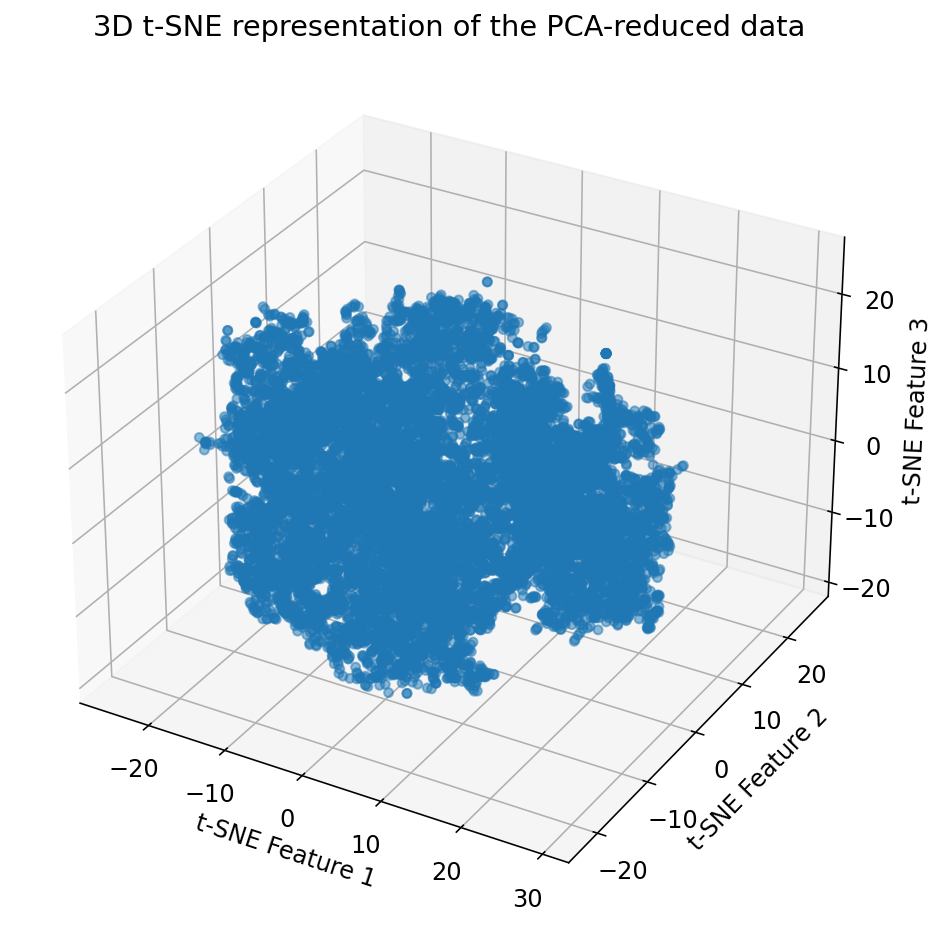

In [129]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to the PCA-reduced data to get a 3D view
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
data_tsne_3d = tsne.fit_transform(data_pca)

# Plot t-SNE in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], alpha=0.5)

ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
ax.set_title('3D t-SNE representation of the PCA-reduced data')
plt.show()

Perplexity measures the effective number of local neighbors that each point has and it determines the visualization of clusters. A higher perplexity value will cause t-SNE to consider large local neighborhoods for each point which leads to a global structure of the data in the visualization. Additionally, a higher perplexity will also lead to a loss in the local structure of the data since too much of the data is considered in each point's neighborhood. On the other hand, a low perplexity value will cause t-SNE to focus too much on the local structure and not be able to capture the global structure between clusters. Now, that we know how perplexity works, we try increasing and reducing the perplexity to see which value gives us the visualization with the most distinguishable clusters that capture local and global structure.

After plotting t-SNE for the 9 PCA components with perplexity 10, we clearly see that a perplexity value of 10 takes into account too much of the local structure of the data points. After increasing perplexity to a higher value of 100, the t-SNE plot shows an improvement from the previous plot since the there is now a clearer structure to the clusters. However, it still does not show distinct clusters with clear gaps between them. 

When we try decreasing the perplexity to 60 and see if the clusters become more apparent, the t-SNE plot better visualizes more clusters where there are clear gaps. Although there are still some densely packed clusters with no gaps, I believe that this plot best represents the clusters of our data points and has the optimal hyperparameters. 

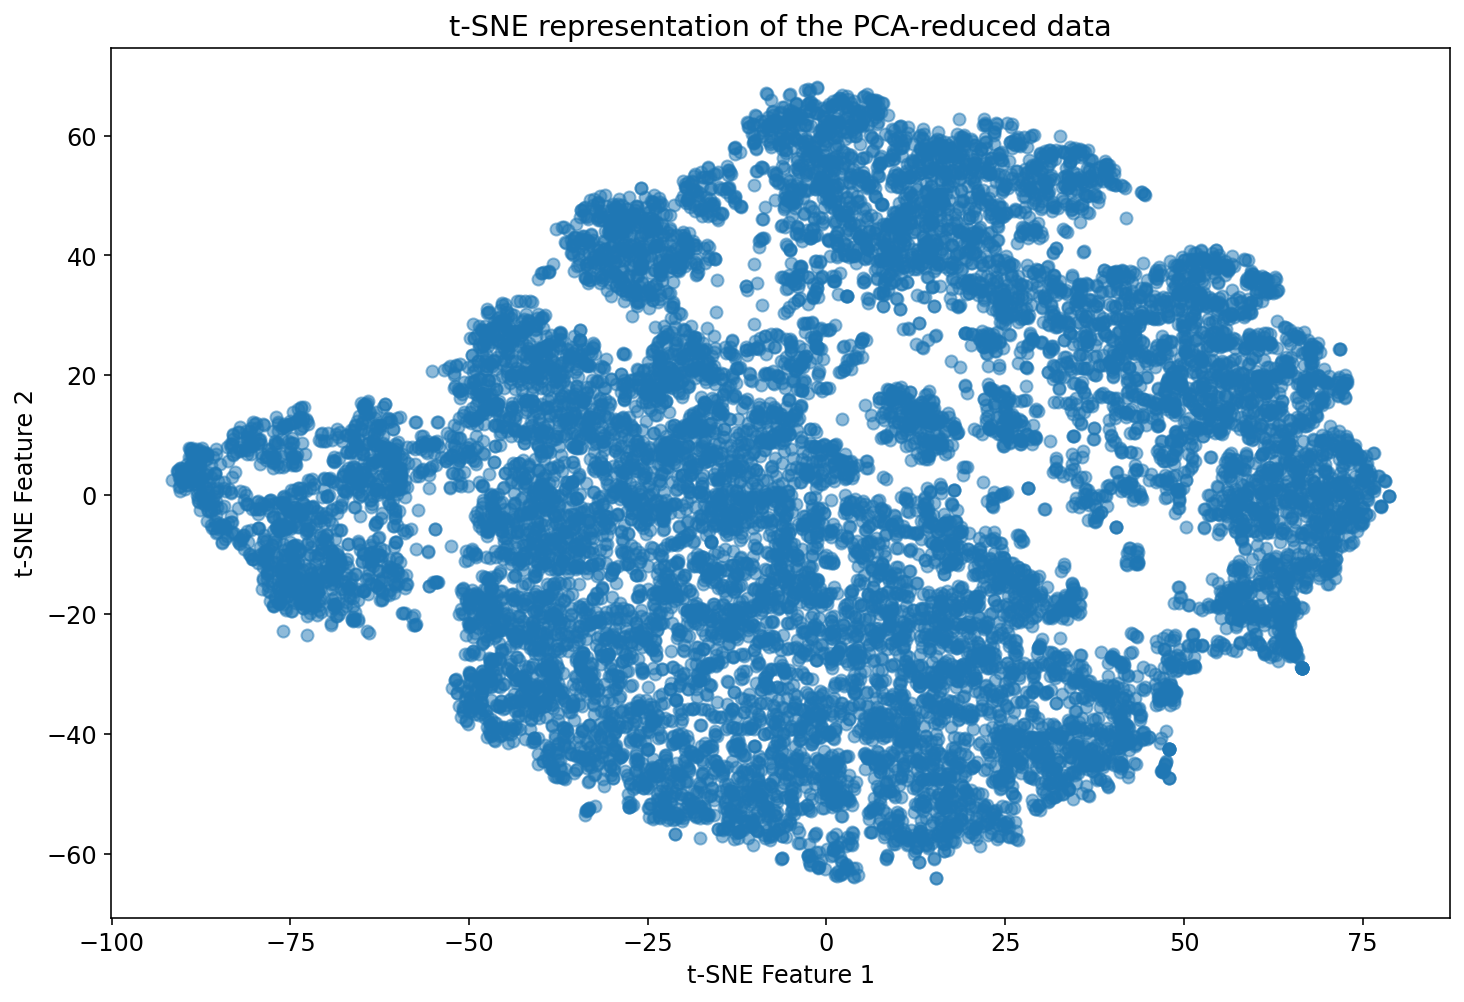

In [48]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=60, n_iter=1000, random_state=42)
# Using 9 PCA components
data_tsne = tsne.fit_transform(data_pca)

# Plot t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE representation of the PCA-reduced data')
plt.show()

### UMAP

Next, we try UMAP with different hyperparameters. 

When we try setting the hyperparameters as n_neighbors=10 and min_dist=0.1, the UMAP plot shows a clear global structure of the dataset where there are 2 outliers. The clusters shown in the plot are not isolated and are densely packed. For UMAP, we have 2 hyperparameters to experiment with. The first hyperparameter is n_neighbors and it determines how UMAP will balance the local and global structures of the data. Increasing n_neighbors will reveal more of the global structure and less of the local structure. On the other hand, decreasing n_neighbors will reveal more of the local structure and less of the global structure. The second hyperparameter is min_dist and it affects how dense the clusters are. Increasing min_dist will cause UMAP to spread the data points across the plot and so it will capture more of the global structure and less of the local structure. On the contrary, decreasing min_dist will cause the points to cluster more tightly and so it will capture more of the local structure and less of the global structure.  

Then, we experiment with different values of n_neighbors and min_dist to see which combinations produces the visualization with distinguishable clusters. When we try n_neighbors=10 and increasing the min_dist to 0.8, we can see that the data points are more spread out than before since increasing min_dist causes greater separation between clusters. However, there are still no clear clusters to be seen which tell us that there is strong local similarties across the datapoints. Let's try increasing the number of n_neighbors to capture more of the global structure.  

With n_neighbors=20 and min_dist=0.8, the UMAP plot shows no clear clusters since the data points are densly packed together into one dominant cluster. Similar to the previous plots, there are some outliers that are separated from the dominant cluster.

Let's try plotting the UMP with n_neighbors value 20 and decreasing the min_dist to 0.1 to see if it can capture more of the local structure from this dominant cluster. The UMAP plot shows 2 dominant clusters with densely packed data points as well as two smaller clusters below them. However, it is difficult to determine if there are any sub clusters within them as they are too tightly packed together with no clear gaps. As a result, it is difficult to determine the best combination of n_neighbors and min_dist to clearly visualize the clusters.

The graph below shows what we decided was the best combination of hyperparameters.

C:\Users\lucy\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


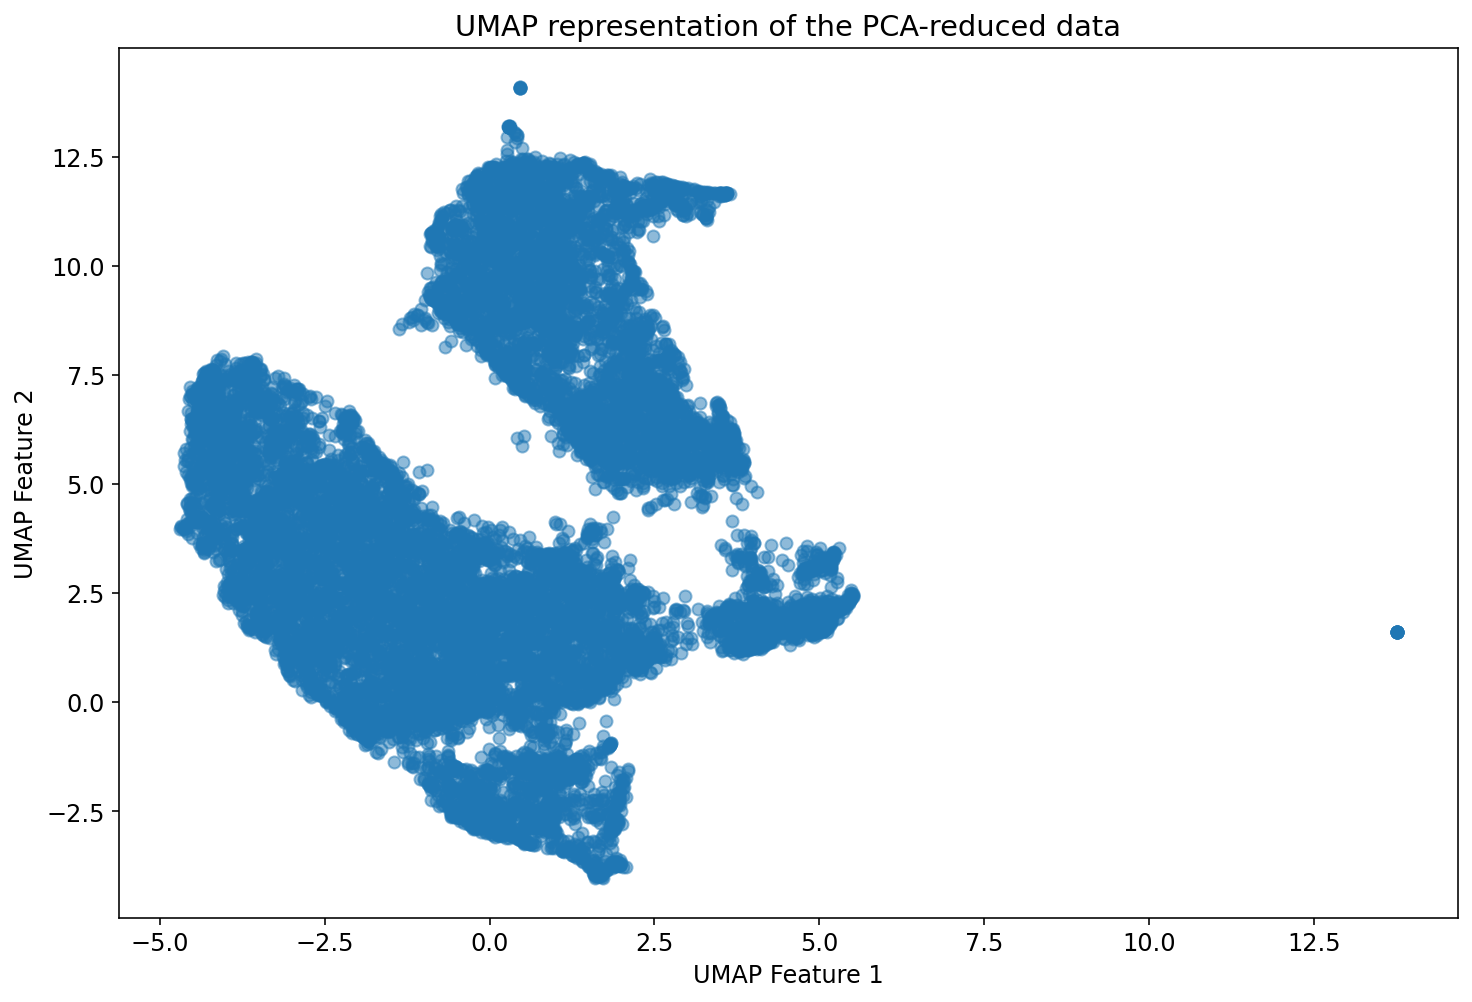

In [18]:
# Apply UMAP to the PCA-reduced data
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
data_umap = umap_model.fit_transform(data_pca)

# Plot the result of the UMAP
plt.figure(figsize=(12, 8))
plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.5)

plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.title('UMAP representation of the PCA-reduced data')

plt.show()

## Clustering Methods

### DBSCAN
We first try DBSCAN as a baseline model. This is a density based spatial clustering of datasets with noise, which defines clusters as high density areas with low density areas (noise) in between. Clusters can be any arbitrary shape. Hyperparameters include:
- eps: maximum distance between two samples to be considered neighbors to each other
- min_samples: number of samples in a neighborhood for a point to be considered a core point (higher value means more dense)

At first, we tried running DBSCAN on the t-SNE embedding; the results were not ideal because although some clusters are identified, most of the datapoints are too close together to form proper clusters. The silhouette score is also quite low. There's no lower density areas to separate out clusters. 

Instead, let's try using the UMAP embedding, which is slightly more separated.

In [1]:
db_cluster = DBSCAN(eps=3, min_samples=3).fit(data_umap)
labels = db_cluster.labels_ 

NameError: name 'DBSCAN' is not defined

In [ ]:
# use umap representation and color with DBSCAN labels of the clusters
plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.5, c=labels)
plt.show()

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(data_umap, labels):.3f}")

In conclusion, DBSCAN is not the right method to use. The clusters are not separated by areas of low density, so DBSCAN can't tell what is a cluster and what isn't. Although the silhouette score for clustering on the umap embedding is not very low, most points are assigned to one cluster, which is not ideal for separating out genres. 

### K-Means Clustering
Next, we try the K-means clustering algorithm. Although it makes some assumptions about the structure of the data, we want to see what clustering might look like using this algorithm. To select a K-means clustering model, we perform an exhaustive grid search over various parameter combinations to find the optimal parameter configuration that maximizes the silhouette score.

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7],    # number of clusters to try
    'init': ['k-means++', 'random'],  # method for initialization
    'max_iter': [100, 200, 300],      # max number of iterations for a single run
    'n_init': [10, 20, 30]            # number of times the KMeans algorithm will be run with different centroid seeds
}


# initialize lists to store parameter combinations & silhouette scores
n_cluster_lst = []
init_lst = []
max_iter_lst = []
n_init_lst = []
silhouette_scores = []
max_score = 0
# iterate over each parameter combination
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            for n_init in param_grid['n_init']:
                kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=n_init)
                
                # fit KMeans to data w curr parameter combination & compute silhouette score
                kmeans.fit(data_pca[:, :3])
                score = silhouette_score(data_pca[:, :3], kmeans.labels_)
                # add params & score to lists
                n_cluster_lst.append(n_clusters)
                init_lst.append(init)
                max_iter_lst.append(max_iter)
                n_init_lst.append(n_init)   
                silhouette_scores.append(score)
                # update max score
                if score > max_score:
                    max_score = score
                    max_n_clusters = n_clusters
                    max_init = init
                    max_max_iter = max_iter
                    max_n_init = n_init
results_df = pd.DataFrame({'n_clusters': n_cluster_lst, 'init': init_lst, 'max_iter':max_iter_lst, 'n_init':n_init_lst ,'silhouette_score': silhouette_scores})
results_df             

n_clusters       init  max_iter  n_init  silhouette_score
0            3  k-means++       100      10          0.386074
1            3  k-means++       100      20          0.386515
2            3  k-means++       100      30          0.385994
3            3  k-means++       200      10          0.385997
4            3  k-means++       200      20          0.385997
..         ...        ...       ...     ...               ...
85           7     random       200      20          0.268224
86           7     random       200      30          0.268317
87           7     random       300      10          0.268174
88           7     random       300      20          0.268178
89           7     random       300      30          0.268174

[90 rows x 5 columns]

We store the best K-means model and plot the clustering results. 

In [16]:
best_kmeans = KMeans(n_clusters=max_n_clusters, init=max_init, max_iter=max_max_iter, n_init=max_n_init)
best_kmeans.fit(data_pca[:, :3])
print(f"Best KMeans Silhouette Coefficient: {silhouette_score(data_pca[:, :3], best_kmeans.labels_):.3f}")

Best KMeans Silhouette Coefficient: 0.386


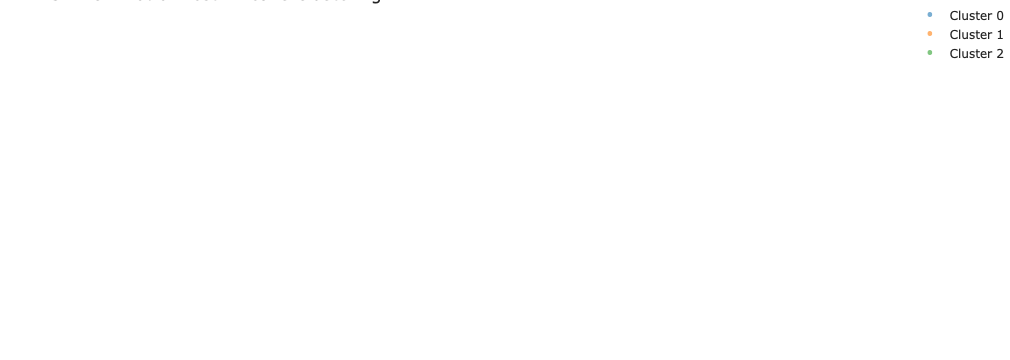

In [15]:
import plotly.graph_objs as go

# Create traces for each cluster
traces = []
for cluster in range(max_n_clusters):
    cluster_data = data_pca[best_kmeans.labels_ == cluster]
    trace = go.Scatter3d(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        z=cluster_data[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.6,
        ),
        name=f'Cluster {cluster}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='3D PCA Plot of Best KMeans Clustering',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3'),
    ),
    margin=dict(r=0, b=0, l=0, t=0),
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

The 3D visualization displays KMeans' ability to disinguish a clear separation of distinct groups within the data, as the grid search found that the optimal parameters for KMeans included n_clusters = 3. Although this separates the data into 3 general structures, we can use another approach to find more nuanced clusters in the data.

### Spectral Clustering

Let's try another method, spectral clustering, to see if we can get better silhouette scores. Spectral clustering works especially well for non-convex clusters.

We first tried to use GridSearchCV to run cross-validation, but ran into issues defining a custom scoring method because we don't have ground-truth labels. Instead, we used a for loop to try different values of the hyperparameters affinity and n_clusters. Picking the number of clusters is especially important to make sure we get the best clustering results. 

In [17]:
# alternate way to do model selection
# results when running on pca embedding: 
# n_clusters 4, silhouette score: 0.41030660112162143
#n_clusters 7, silhouette score: 0.25327376118458705
# n_clusters 10, silhouette score: 0.24424177805987018
# n_clusters 20, silhouette score: 0.1531012362623862

n_clusters = [4, 7, 10, 20]

for i in range(0, len(n_clusters)):
  spect_labels = SpectralClustering(assign_labels='cluster_qr', random_state=0, n_clusters=n_clusters[i]).fit_predict(data_pca)
  score = silhouette_score(data_pca, spect_labels)
  print('n_clusters ' + str(n_clusters[i]) + ", silhouette score: " + str(score))

n_clusters 10, silhouette score: 0.24424177805987018
n_clusters 20, silhouette score: 0.1531012362623862


In [22]:
# now run with umap embedding 
# best result: n_clusters=4, affinity=nearest_neighbors with silhouette score of 0.46
n_clusters = [4, 7, 10, 20]
affinity = ['nearest_neighbors', 'rbf']

for i in range(0, len(n_clusters)):
  for j in range(0, len(affinity)):
    spect_labels = SpectralClustering(assign_labels='cluster_qr', random_state=0, n_clusters=n_clusters[i],
                                      affinity=affinity[j]).fit_predict(data_umap)
    score = silhouette_score(data_umap, spect_labels)
    print('n_clusters ' +  str(n_clusters[i]) + ", affinity: " + str(affinity[j]) + ", silhouette score: " + str(score))

C:\Users\lucy\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters 4, affinity: nearest_neighbors, silhouette score: 0.46358296
n_clusters 4, affinity: rbf, silhouette score: 0.41167408


C:\Users\lucy\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters 7, affinity: nearest_neighbors, silhouette score: 0.44483522
n_clusters 7, affinity: rbf, silhouette score: 0.45543715


C:\Users\lucy\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters 10, affinity: nearest_neighbors, silhouette score: 0.4270293
n_clusters 10, affinity: rbf, silhouette score: 0.43357706


C:\Users\lucy\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


n_clusters 20, affinity: nearest_neighbors, silhouette score: 0.35537645
n_clusters 20, affinity: rbf, silhouette score: 0.37358105


After running spectral clustering on both the UMAP and PCA embeddings and trying different combinations of hyperparameters, we determine that using the UMAP embedding with hyperparameters of n_clusters=4 and affinity=nearest_neighbors gives the best silhouette score of 0.46. We plot what the clustering looks like below:

In [ ]:
# plotly version of graph to enable hover text
fig = px.scatter(x=data_umap[:, 0], y=data_umap[:, 1], title='Spectral Clustering of Spotify Data, n=4', opacity=0.5,
                 color=spect_labels,
                 hover_data=[hover_info['name'], hover_info['artists']], 
                labels={'hover_data_0' : 'name', 'hover_data_1' : 'artists'})
fig.show()

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(data_umap, spect_labels):.3f}")

# Discussion

### Interpreting the result
In our analysis, utilizing t-SNE and UMAP has provided valuable insights into the complex structure of the Spotify dataset. For instance, UMAP was effective in highlighting and distinguishing the outliers in the data which tells us that there are tracks in the dataset with distinctive features that set them apart from other tracks. Both visualization techniques were beneficial in allowing us to visualize the dataset’s overall global structure. On the contrary, the local structure was extremely difficult for t-SNE and UMAP to visualize. Despite trying different combinations of hyperparameters, t-SNE and UMAP were not able to generate a visualization that clearly demonstrated a separation of the densely packed clusters. It was always the case that there were one or two densely packed clusters accompanied by a few other irregularly shaped clusters. Therefore, this outcome suggests that the musical genres in our dataset are not very distinct and overlap with each other. Additionally, this has led us to think that the genres in the Spotify dataset do not exist as separate genres but rather as a continuous genre with many songs sharing similar characteristics across the audio features.

Furthermore, it is important to note that both t-SNE and UMAP are non-deterministic algorithms. Therefore, each run may produce different results even with the same dataset and hyperparameters because the starting initialization could be different. As a result, the visualizations generated should be treated with caution and should not be used to draw conclusions. Instead, they provide insightful exploratory views that we can use to further our analysis. To confirm our observations, we will now apply classification algorithms as a next step to determine if our insights are indeed correct.

In the process of tuning hyperparameters and selecting what models best distinguish genres, we had to balance not underfitting and not overfitting our clustering models. Due to the nature of the spotify dataset, we had to use clustering methods who could distinguish complex relationships and patterns. Thus traditional methods such as K-means and DBSCAN were not as effective for our dataset due to their limitations in handling non-linear and different shaped clusters, and our dataset’s densely packed and not clearly separated nature. Moreover, our reliance on silhouette scores as an evaluation metric revealed their limitations, as they do not account for how broad or specific the clusters are within the whole dataset when assessing their quality, and assume that clusters are well-separated and independent. For example when we used DBscan to cluster the data it gave us a promising silhouette score of 0.432 when most of the data was all in one cluster. Our exploration of clustering techniques highlighted the challenges posed by the dense and overlapping nature of the dataset, which hindered the effectiveness of traditional methods like K-means and DBSCAN, and encouraged us to look for a clustering method which can capture these nuances.

We found that spectral clustering performed the best at capturing small intricacies within the densely populated dataset. We were able to identify 9 clusters within the dataset, which visually look well separated, and yielded a silhouette score of 0.434. We decided to do a qualitative analysis of the data to see if these clusters make sense. We conducted our qualitative analysis, by hypothesizing genres which could correspond to each cluster. We did so by sampling songs from each cluster and noticing common themes within each cluster. Our hypothesis is that the following are the corresponding genres for each cluster (and 2 sample songs in the cluster).

1. Soundtrack Music (Classical)
    - The King's Thief by Miklos Rozsa
    - Eternal Pine by Chou Wen-chung
2. Rock
    - Love to Hate You by Die Happy 
    - Kiss of Death by Dokken
3. Folk
    - Across the Water by Norman Meehan
    - Times Are Not What They Used To Be by Mo Stroemel
4. Rap
    - Pain by A$AP Rocky & OverDoz.
    - Rosewood by Yung Redd & Lil Ron
5. Latin Music
    - Las Voces by Josh Rouse
    - Te digo vete by Cumbia Latin Band
6. Electronic Dance Music
    - Horizon by Tycho
    - Magnitude Six by Man Machine
7. Neo-Classical Jazz
    - Tin Tin Deo by Dizzy Gillespie 
    - My Kinda Love by Dexter Gordon & Wardell Gray
8. RnB/Pop
    - Anthems by Charli XCX
    - SexBeat by Usher, LilJon, Ludacris
9. Indie 
    - A Good Man's Light Angelo De Augustine
    - Sunday Morning Bird by Girlyman

We observed that the majority of songs within each cluster exhibited consistent genre characteristics, aligning well with our expectations, with some instances of outlier songs that deviated from their respective cluster’s predominant genre. Despite the songs having a range of different popularity, geographic origin, and stylistic elements, spectral clustering demonstrated remarkable efficiency in determining nonlinear clusters which separate the songs into distinct genres.


### Limitations

One limitation of our work — something we'd do more research on and try to figure out if we had more time or if we chose to extend this project in the future — is the use of categorical variables to do PCA. When we first started preprocessing our data we noted a number of categorical variables within the dataset alongside the the many numerical variables we had planned to consider, so we tried to one-hot encode them. The result of this was an incredibly massive set of features — variables like artist name and album name, once encoded, ballooned in size until the size of the matrix became computationally too expensive to work with. We ended up discarding those categorical variables and only using the numerical ones. A member of the instructional team told us that if we wanted to use categorical variables to do PCA with in a manageable way it might be worth looking into MCA (Multiple Correspondence Analysis), which would be an area of future work, potentially.

### Ethics & Privacy
In this section, we will discuss the ethics and data privacy that will be associated with our data science project. We will address and provide solutions to mitigate the key areas which include user consent and anonymity, transparency in data use and analysis techniques, compliance with data protection laws and data equality.

In our project, we will ensure that the data has been collected with the users’ consent where the data is anonymized. Sensitive information such as names, user IDs, and other personal information that could distinguish the user will be removed. By doing this, we will have protected the users’ individual privacy from potential cyber attacks and misuse. In regards to our dataset, the data was collected by Spotify where the features were derived from officially published music, so there's not too much to worry about with regard to privacy or personal data. If, however, relevant data that described the listening habits of the people streaming these songs was pulled and used, that would be a much bigger issue: we'd have to make sure the people whose data was being collected a) knew and consented to the collection in the first place and b) consented to their data being used to train ML models.

To foster transparency, we will be clear in the purpose of our data analysis as well as maintain a clear documentation of what the data is being used for as well as for what purposes. Likewise, the algorithms and clustering techniques that we employ will also be well documented so that it can be recreated in the future to ensure trust and transparency in our findings.

Compliance with data protection laws is also an important aspect that we will address. We will ensure that the data is in compliance with data protection laws and also allow users the right to request their data be removed from the database. This will help to ensure our practices are in line with current legal standards and at the same time protecting user data.

To address potential biases, we will thoroughly look through and analyze the data’s natural distribution. We will use graphical techniques to identify any imbalances which could lead to skewed results and unfair representations. Additionally, we can also make sure that the dataset includes a diverse range of music genres and artists to promote fairness and prevent skewed outcomes.

Lastly, we will ensure that our results will not affect user behavior such as how it could contribute to increased screen time or usage addiction. To mitigate this, we will promote healthy usage such as incorporating usage limit reminders.


### Conclusion
In essence, we discovered that the nature of our dataset is such that the genres are not distinct and overlap. However, we were still able to gain an understanding of which songs are more similar based on features like tempo, valence, and danceability. Our work fits into the context of other work in the field such as creating marketing segments to determine similar users and recommender systems for songs, videos, and movies.  Directions for future work include trying to cluster with categorical variables, as we were not able to do this due to the size of the dataset after one-hot encoding. We could do this using MCA (Multiple Correspondence Analysis). We could also include more data in our clustering if we had more time to see if our clustering improves. Lastly, we could create a recommender system based on what our clustering results to recommend songs to users based on their existing playlists. 

# Footnotes
<a name="henkenote"></a>1.[^](#henke): Henke, Nicolaus, et al. THE AGE OF ANALYTICS: COMPETING IN A DATA-DRIVEN WORLD, McKinsey Global Institute, Dec. 2016, [dln.jaipuria.ac.in:8080/jspui/bitstream/123456789/2898/1/MGI-Reinventing-Construction-Full-report.pdf.](dln.jaipuria.ac.in:8080/jspui/bitstream/123456789/2898/1/MGI-Reinventing-Construction-Full-report.pdf.)<br> 
<a name="zhangziangnote"></a>2.[^](#zhangziang): Zhang, Ziang, and Jingbo Chang. “Clustering-Based Categorization of Music Users through Unsupervised Learning.” Economics & Management Information, 30 Dec. 2022, [doi.org/10.58195/emi.2022.1006](doi.org/10.58195/emi.2022.1006)<br>
<a name="kodinariyanote"></a>3.[^](#kodinariya): Kodinariya, Trupti M, and Prashant R. Makwana. “Review on Determining Number of Cluster in K-Means Clustering.” International Journal of Advance Research in Computer Science and Management Studies, Nov. 2013, [www.researchgate.net/publication/313554124_Review_on_Determining_of_Cluster_in_K-means_Clustering](www.researchgate.net/publication/313554124_Review_on_Determining_of_Cluster_in_K-means_Clustering).<br>
<a name="dbscannote"></a>4.[^](#dbscan): "DBSCAN." Wikipedia, Wikimedia Foundation, [https://en.wikipedia.org/wiki/DBSCAN](https://en.wikipedia.org/wiki/DBSCAN). <br>
<a name="spectralclusteringnote"></a>5.[^](#spectralclustering): "Spectral Clustering." Wikipedia, Wikimedia Foundation, [en.wikipedia.org/wiki/Spectral_clustering](https://en.wikipedia.org/wiki/Spectral_clustering). <br>
<a name="figueroanote"></a>6.[^](#figueroa): Figueroa, Rodolpho. Spotify 1.2M+ Songs. (1). [https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/data](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/data). 